In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Sıralı katmanlar oluşturmak için sequential metotunu kullanıyoruz
model = Sequential([
    Conv2D(16,kernel_size=3,padding='SAME',strides=2,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])
#modeli görüntülüyoruz
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Optimizer, kayıp ve ortalama hatayı tanımlıyoruz

opt=tf.keras.optimizers.Adam(learning_rate=0.005) # opt
acc=tf.keras.metrics.CategoricalAccuracy() #doğruluk
mae=tf.keras.metrics.MeanAbsoluteError() #ortalama hata
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])

In [5]:
#Mnist Fashion verisetini yüklüyoruz
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [7]:
#Eğitim datamızın boyutunu görüntülüyoruz
train_images.shape

(60000, 28, 28)

In [10]:
#Sınıfları tanımlıyoruz
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [11]:
#Görüntü değerlerii 0-1 arasında olacak şekilde ölçeklendiriyoruz
train_images=train_images/255.
test_images=test_images/255.

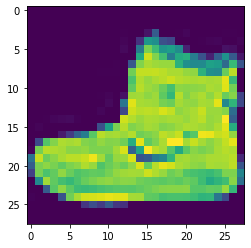

In [12]:
#Resimlerden birini görüntülüyoruz
img=train_images[0,:,:]
plt.imshow(img)

In [13]:
#Modeli düzenliyoruz
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=20,batch_size=256)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7252 - categorical_accuracy: 0.1043 - mean_absolute_error: 4.4200
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4561 - categorical_accuracy: 0.1031 - mean_absolute_error: 4.4200
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4185 - categorical_accuracy: 0.1038 - mean_absolute_error: 4.4200
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4021 - categorical_accuracy: 0.1035 - mean_absolute_error: 4.4200
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3893 - categorical_accuracy: 0.1041 - mean_absolute_error: 4.4200
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3801 - categorical_accuracy: 0.1035 - mean_absolute_error: 4.4200
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3749 - categorical_accuracy: 0.1033 - mean_absolute_error: 4.4200
Epoch 

In [16]:
#Dataframe ile ilk 5 değişimi görüntülüyoruz
df=pd.DataFrame(history.history)
df.head()

,loss,categorical_accuracy,mean_absolute_error
0,0.725184,0.104333,4.420001
1,0.456052,0.103083,4.420000
2,0.418510,0.103817,4.420002
3,0.402087,0.103483,4.420000
4,0.389283,0.104067,4.419999


[Text(0.5, 0, 'Epochs')]

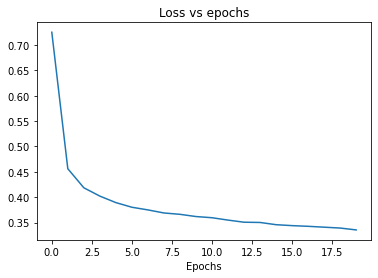

In [17]:
#Kayıp fonksionunu çizdiriyoruz
loss_plot=df.plot(y='loss',title='Loss vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

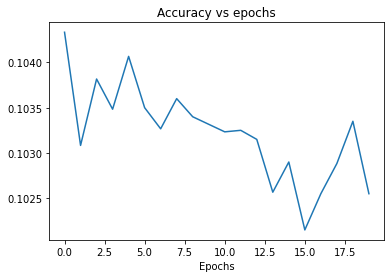

In [18]:
#Doğruluk fonksiyonunu çizdiriyoruz
loss_plot=df.plot(y='categorical_accuracy',title='Accuracy vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

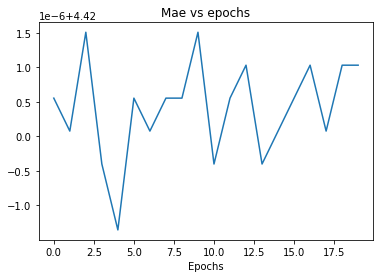

In [19]:
#Ortalama hatayı çizdiriyoruz
loss_plot=df.plot(y='mean_absolute_error',title='Mae vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')

In [20]:
#Modeli hesaplıyoruz
test_loss,test_acc,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

313/313 - 0s - loss: 0.3896 - categorical_accuracy: 0.1187 - mean_absolute_error: 4.4200


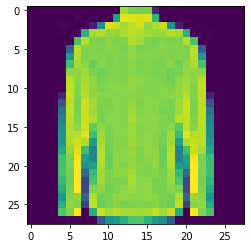

Label: Shirt


In [21]:
#Rastgele bir data seçiyoruz
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[1320]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[1320]]}")

In [22]:
#Modelimizin tahminini öğrenelim
pred=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model predictions:{labels[np.argmax(pred)]}' )

Model predictions:Shirt
